### Access libraries that will be used

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

### Load file into data frame and inspect for adequacy

In [81]:
pd.set_option('display.max_rows', None)
magic=pd.read_csv(r'P:\Users\amayer\Documents\GitHub\Orlando-Magic-GameScore-Stats-and-Graphics-2020_21-Season\Data\ConvertStatHead.csv')
magic.head()

,FirstName,LastName,Age,Pos,Tm,H/A,Opp,Column2,Date,GS,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,BPM
0,Nikola,Vučević,30-066,C,ORL,A,OKC,W,12/29/2020,1,...,7,10,5,1,0,1,0,28,27.9,13.7
1,Nikola,Vučević,30-070,C,ORL,H,OKC,L,1/2/2021,1,...,11,13,2,0,0,1,1,30,25.2,13.0
2,Nikola,Vučević,30-072,C,ORL,H,CLE,W,1/4/2021,1,...,6,8,2,2,3,0,0,23,24.1,18.8
3,Evan,Fournier,28-055,G-F,ORL,H,MIA,W,12/23/2020,1,...,0,0,4,3,0,2,2,25,22.1,12.4
4,Aaron,Gordon,25-110,F,ORL,H,CLE,W,1/4/2021,1,...,5,11,1,1,0,2,1,24,20.7,15.8


In [82]:
magic.tail()

,FirstName,LastName,Age,Pos,Tm,H/A,Opp,Column2,Date,GS,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,BPM
81,Michael,Carter-Williams,29-084,G,ORL,H,OKC,L,1/2/2021,1,...,5,9,1,0,0,1,5,4,-0.9,-16.3
82,Karim,Mané,20-229,G,ORL,H,PHI,L,12/31/2020,0,...,4,4,0,0,0,0,1,0,-1.3,-13.7
83,Dwayne,Bacon,25-115,G,ORL,H,MIA,W,12/23/2020,1,...,3,3,3,0,0,0,2,0,-1.3,-12.7
84,Mohamed,Bamba,22-239,C,ORL,H,CLE,W,1/6/2021,0,...,1,1,0,0,0,0,2,0,-1.9,NaN
85,Michael,Carter-Williams,29-086,G,ORL,H,CLE,W,1/4/2021,1,...,0,1,3,0,1,2,2,0,-2.1,-11.8


### Display data using histogram, swarmplot, and boxplot

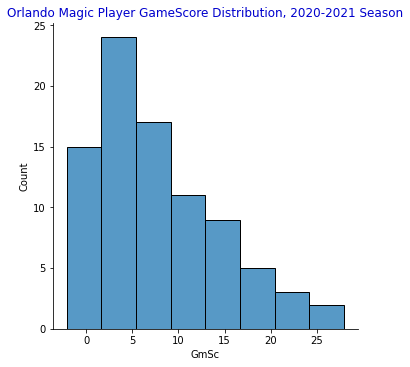

In [83]:
sns.displot(magic['GmSc'])
plt.title("Orlando Magic Player GameScore Distribution, 2020-2021 Season", color='mediumblue')
plt.show()

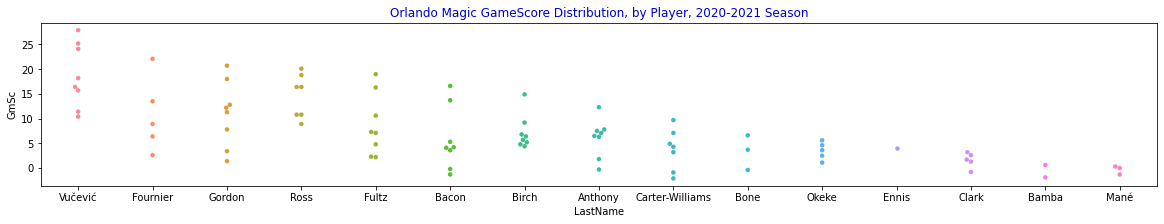

In [84]:
fig, ax = plt.subplots(figsize=(20,3))
sns.swarmplot(x="LastName", y="GmSc", data=magic, ax=ax, s=4.5)
plt.title("Orlando Magic GameScore Distribution, by Player, 2020-2021 Season", color='mediumblue')
plt.show()

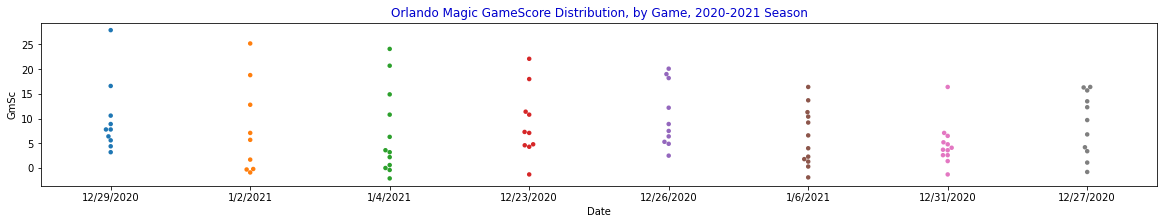

In [85]:
fig, ax = plt.subplots(figsize=(20,3))
sns.swarmplot(x="Date", y="GmSc", data=magic, ax=ax, s=4.5)
plt.title("Orlando Magic GameScore Distribution, by Game, 2020-2021 Season", color='mediumblue')
plt.show()

GameScore versus Minutes Played, by Player


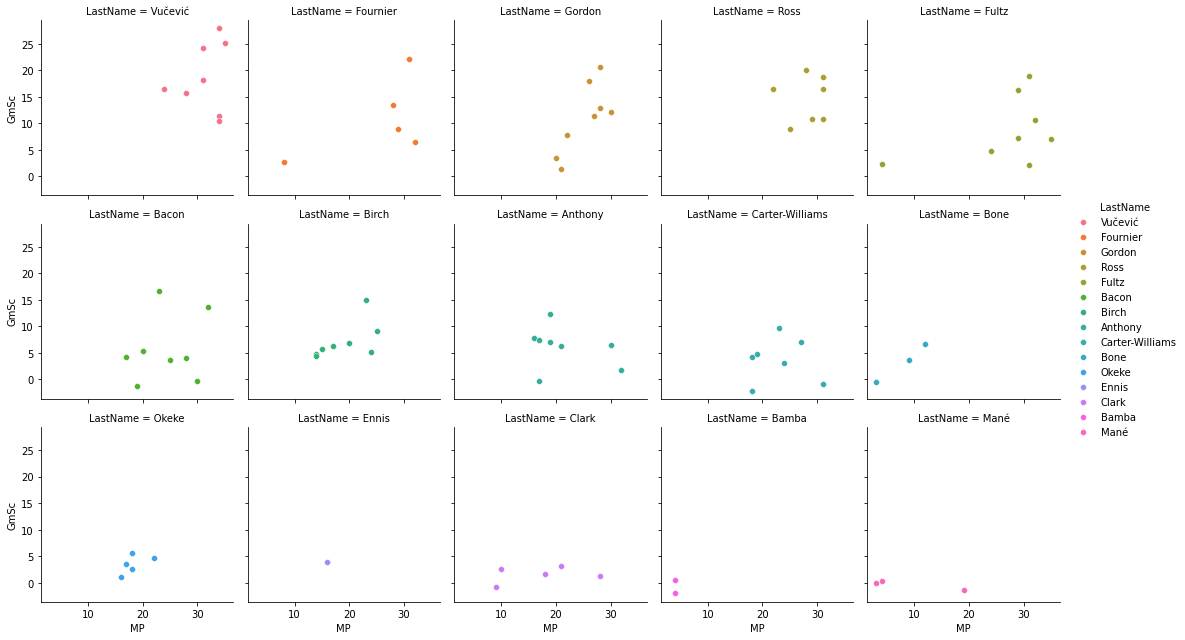

In [89]:
grid = sns.FacetGrid(magic, col = 'LastName', hue = 'LastName', col_wrap=5)
grid.map(sns.scatterplot, 'MP', 'GmSc')
grid.add_legend()
print ("\033[1m"+(colored("GameScore versus Minutes Played, by Player", 'blue'))+"\033[0m")
plt.show()

### Calculate each player's average gamescore, standard dev., and quartiles

In [54]:
print('Average Player GameScore')
magic[['LastName','GmSc']].\
groupby(['LastName'], as_index=False).mean()

Average Player GameScore


,LastName,GmSc
0,Anthony,6.125000
1,Bacon,5.750000
2,Bamba,-0.650000
3,Birch,7.175000
4,Bone,3.300000
5,Carter-Williams,3.742857
6,Clark,1.600000
7,Ennis,4.000000
8,Fournier,10.700000
9,Fultz,8.700000


In [55]:
print('GameScore Standard Deviation by Player')
magic[['LastName','GmSc']].\
groupby(['LastName'], as_index=False).std()

GameScore Standard Deviation by Player


,LastName,GmSc
0,Anthony,3.853292
1,Bacon,6.278990
2,Bamba,1.767767
3,Birch,3.462761
4,Bone,3.517101
5,Carter-Williams,4.171274
6,Clark,1.534601
7,Ennis,NaN
8,Fournier,7.502333
9,Fultz,6.215189


In [56]:
print('GameScore Quartile Distribution, by Player')
magic[['LastName','GmSc']].\
groupby(['LastName'], as_index=False).quantile([1,0.75,0.5,0.25,0])

GameScore Quartile Distribution, by Player


LastName    GmSc
0  1.00          Anthony  12.300
   0.75          Anthony   7.575
   0.50          Anthony   6.800
   0.25          Anthony   5.175
   0.00          Anthony  -0.300
1  1.00            Bacon  16.600
   0.75            Bacon   7.400
   0.50            Bacon   4.150
   0.25            Bacon   2.650
   0.00            Bacon  -1.300
2  1.00            Bamba   0.600
   0.75            Bamba  -0.025
   0.50            Bamba  -0.650
   0.25            Bamba  -1.275
   0.00            Bamba  -1.900
3  1.00            Birch  14.900
   0.75            Birch   7.400
   0.50            Birch   6.050
   0.25            Birch   5.100
   0.00            Birch   4.400
4  1.00             Bone   6.600
   0.75             Bone   5.150
   0.50             Bone   3.700
   0.25             Bone   1.650
   0.00             Bone  -0.400
5  1.00  Carter-Williams   9.700
   0.75  Carter-Williams   6.000
   0.50  Carter-Williams   4.300
   0.25  Carter-Williams   1.150
   0.00  Carter-Williams  -2.100
6  1.00            Clark   3.200
   0.75            Clark   2.600
   0.50            Clark   1.700
   0.25            Clark   1.300
   0.00            Clark  -0.800
7  1.00            Ennis   4.000
   0.75            Ennis   4.000
   0.50            Ennis   4.000
   0.25            Ennis   4.000
   0.00            Ennis   4.000
8  1.00         Fournier  22.100
   0.75         Fournier  13.500
   0.50         Fournier   8.900
   0.25         Fournier   6.400
   0.00         Fournier   2.600
9  1.00            Fultz  19.000
   0.75            Fultz  12.025
   0.50            Fultz   7.200
   0.25            Fultz   4.175
   0.00            Fultz   2.200
10 1.00           Gordon  20.700
   0.75           Gordon  14.100
   0.50           Gordon  11.750
   0.25           Gordon   6.700
   0.00           Gordon   1.400
11 1.00             Mané   0.300
   0.75             Mané   0.150
   0.50             Mané   0.000
   0.25             Mané  -0.650
   0.00             Mané  -1.300
12 1.00            Okeke   5.600
   0.75            Okeke   4.600
   0.50            Okeke   3.600
   0.25            Okeke   2.500
   0.00            Okeke   1.100
13 1.00             Ross  20.100
   0.75             Ross  17.600
   0.50             Ross  16.400
   0.25             Ross  10.800
   0.00             Ross   8.900
14 1.00          Vučević  27.900
   0.75          Vučević  24.375
   0.50          Vučević  17.300
   0.25          Vučević  14.625
   0.00          Vučević  10.400